# Rat Lick Plots using ReachMaster Data - HDF File
### Authors: Harnoor Dhingra, Brett Nelson (NSDS Lab, LBNL)
#### Inputs: ReachMaster's HDF file and Analysis_Utils.py (in the same directory).
#### Output 1. Rate of Lick over 100 time units plots. Note: The plots are for 0-100 time units ... 600-700 time units. Depending on 'len(duplicateFrequencies)' we can add/reduce the number of graphs for plotting. The reason for plotting over 100 time units is better representation of the graphs. 
#### Output 2. The graph at the end of the notebook is the number of licks - time graph over the entire trial video. 
#### Note: Just change the values of Rat-Date-Session in the function call 'ddv1 = get_single_trial(df,'insert date','insert session number','insert rat number')' and run the entire notebook

In [61]:
import numpy as np
import seaborn as sns
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
from Analysis_Utils import preprocessing_df as preprocessing
from Analysis_Utils import query_df
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import cv2
from sys import exit
import glob
from scipy.interpolate import CubicSpline
%matplotlib notebook

In [62]:
%matplotlib notebook

# Importing Data

In [63]:
def import_robot_data(df_path):
    df = pd.read_hdf(df_path)
    df = preprocessing(df)
    return df
import ast

In [64]:
hdf = import_robot_data('/Users/harnoor_dhingra/Desktop/Project Thesis/Project - Robot Data_hdf file_19Aug/default_save.h5')
hdf = hdf.reset_index(drop=True)

In [65]:
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, 0:num])
        line.set_3d_properties(data[2,0:num])
    return lines

In [66]:
hdf.head()

,rat,S,Date,dim,time,m_start,m_stop,SF,t_m,lick,...,x_p,y_p,z_p,x0,y0,z0,moving,RW,r_start,r_stop
0,RM9,S2,18,3,"[20.859866697184316, 20.8858667200725, 20.9028...","[31.668866712443105, 67.45086677729296, 105.33...","[35.674866754404775, 71.4538667982738, 109.495...","[2, 3, 4, 5, 6, 7, 8, 9, 13, 17, 19, 20, 21, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 35.6913, 35.6982, 36.564233333333334, 10...",...,655.4 916.8 916.8 655.4 655.4 655.4 916.8 655....,794.8 648.8 648.8 449.0 794.8 794.8 648.8 794....,361.6 571.1 571.1 361.6 707.5 707.5 571.1 707....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[1513, 6563, 12020, 13242, 20341, 21483, 22472...","[2077, 7124, 12612, 13736, 21060, 22046, 23017..."
1,RM9,S1,18,3,"[20.414766451136302, 20.440766474024485, 20.48...","[89.86176647783918, 99.30376662851972, 174.025...","[93.86576666475935, 103.30476655604048, 179.71...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 179.05716666666666, 179.09396666666666, ...",...,614.4 614.4 614.4 614.4 614.4 614.4 614.4 614....,608.0 608.0 608.0 608.0 608.0 608.0 608.0 608....,531.0 531.0 531.0 531.0 531.0 531.0 531.0 531....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[9864, 11201, 21864, 24920, 26074, 27904, 2992...","[10430, 11766, 22667, 25452, 26535, 28404, 304..."
2,RM9,S3,18,3,"[19.026683361943583, 19.089683564122538, 19.10...","[34.658683569844584, 117.32368353169761, 142.7...","[38.665683539327006, 121.32568338673912, 146.1...","[2, 3, 6, 9, 12, 14, 15, 16, 18, 20, 21, 23]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 122.51423333333334, 122.51763333333334, ...",...,655.4 916.8 916.8 655.4 655.4 655.4 916.8 655....,794.8 648.8 648.8 449.0 794.8 794.8 648.8 794....,361.6 571.1 571.1 361.6 707.5 707.5 571.1 707....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[2191, 14018, 17703, 18863, 21270, 31546, 3251...","[2753, 14597, 18205, 19352, 21850, 32097, 3301..."
3,RM9,S4,18,3,"[21.447966702906342, 21.479966767756196, 21.52...","[34.8089667639415, 152.94096673342392, 159.957...","[38.812966712443085, 156.9469667753856, 163.96...","[4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 19, 20, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 214.57526666666666, 214.68453333333332, ...",...,655.4 916.8 916.8 655.4 655.4 655.4 916.8 655....,794.8 648.8 648.8 449.0 794.8 794.8 648.8 794....,361.6 571.1 571.1 361.6 707.5 707.5 571.1 707....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[1873, 18701, 19694, 20832, 26812, 32196, 3331...","[2439, 19269, 20261, 21394, 27761, 32686, 3388..."
4,RM9,S1,19,3,"[20.34046666857398, 20.412466695276862, 20.439...","[36.99546687838233, 93.67546670672095, 103.992...","[40.99946682688392, 97.68146674868262, 107.997...","[3, 5, 9, 12, 13, 16, 19, 20, 21, 22, 23, 27, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 108.04173333333334, 108.04273333333333, ...",...,655.4 916.8 916.8 655.4 655.4 655.4 916.8 655....,794.8 648.8 648.8 449.0 794.8 794.8 648.8 794....,361.6 571.1 571.1 361.6 707.5 707.5 571.1 707....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 ...,"[2332, 10392, 11884, 13810, 15792, 18687, 2008...","[2898, 10977, 12461, 14321, 16370, 19248, 2064..."


# Indexing as Rat - Date - Session Number

In [67]:
# Sorting and Multi-Indexing
df = hdf.sort_values(['rat', 'Date', 'S'])
df = df.set_index(['rat', 'Date', 'S'])
df.head()

dim                                               time  \
rat  Date S                                                           
RM10 17   S1   3  [20.343600175476013, 20.411600015258728, 20.43...   
          S2   3  [20.37000005340576, 20.426000047683715, 20.440...   
          S3   3  [19.484500066757164, 19.50050009918209, 19.525...   
     18   S1   3  [20.1379999485016, 20.193000015258804, 20.2290...   
          S2   3  [21.12278335431415, 21.14078348019916, 21.2137...   

                                                        m_start  \
rat  Date S                                                       
RM10 17   S1  [142.29960002670282, 288.8056000686645, 298.08...   
          S2  [274.2350000629425, 285.5069998989105, 302.520...   
          S3  [61.913499967575035, 188.4325000209808, 202.27...   
     18   S1  [157.60700004959108, 190.90199988746645, 226.9...   
          S2  [36.928783348592106, 44.06178348401386, 93.821...   

                                                         m_stop  \
rat  Date S                                                       
RM10 17   S1  [146.30460014114374, 292.61860003242487, 302.6...   
          S2  [277.86499993896484, 292.25099985694885, 305.7...   
          S3  [65.9195000095367, 191.8205000324249, 205.4205...   
     18   S1  [161.615999874115, 194.55699985885622, 230.535...   
          S2  [40.93078344205219, 48.06778328755695, 97.8277...   

                                                           SF  \
rat  Date S                                                     
RM10 17   S1                                           [3, 4]   
          S2                                  [1, 2, 3, 5, 6]   
          S3  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]   
     18   S1      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15]   
          S2                   [7, 9, 15, 20, 21, 22, 23, 24]   

                                                            t_m  \
rat  Date S                                                       
RM10 17   S1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
          S2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
          S3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     18   S1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
          S2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                           lick  \
rat  Date S                                                       
RM10 17   S1  [0.0, 541.2396333333334, 541.2472666666666, 54...   
          S2  [0.0, 279.68016666666665, 279.7112666666667, 2...   
          S3  [0.0, 121.46453333333334, 190.52003333333334, ...   
     18   S1  [0.0, 82.6542, 82.6982, 83.1201, 194.108833333...   
          S2  [0.0, 209.08166666666668, 209.17086666666665, ...   

                                                            r_x  \
rat  Date S                                                       
RM10 17   S1  [3.041215709448993, 3.000524363480997, 5.01705...   
          S2  [5.005960357380994, 5.01335878392063, 4.758113...   
          S3  [5.01335878392063, 5.01335878392063, 4.7581130...   
     18   S1  [5.01335878392063, 4.857991826588281, 4.243922...   
          S2  [1.7608255164332929, 2.834059766339194, 2.7452...   

                                                            r_y  \
rat  Date S                                                       
RM10 17   S1  [2.9598330175130005, 2.9561338042431826, 2.985...   
          S2  [2.982028297131908, 2.9672314440526364, 2.9709...   
          S3  [2.9968251502111793, 2.9968251502111793, 2.974...   
     18   S1  [2.989426723671543, 2.9857275104017256, 2.9931...   
          S2  [2.3975526005006884, 3.21877794640025, 3.41853...   

                                                            r_z  \
rat  Date S                                                       
RM10 17   S1  [2.619505396689759, 2.6158061834199415, 2.0979...   
          S2  [2.2902754156759713, 2.2

In [68]:
def get_single_trial(df,date,session,rat):
    new_df = df.loc[(rat, date, session)].to_frame()
    return new_df.T

# Change the values in the function call for the required experimental session

In [69]:
ddv1 = get_single_trial(df,'19','S1','RM9')     #date, session, rat
ddv1.head()

,,,dim,time,m_start,m_stop,SF,t_m,lick,r_x,r_y,r_z,x_p,y_p,z_p,x0,y0,z0,moving,RW,r_start,r_stop
RM9,19,S1,3,"[20.34046666857398, 20.412466695276862, 20.439...","[36.99546687838233, 93.67546670672095, 103.992...","[40.99946682688392, 97.68146674868262, 107.997...","[3, 5, 9, 12, 13, 16, 19, 20, 21, 22, 23, 27, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 108.04173333333334, 108.04273333333333, ...","[4.495468926146132, 3.159590534083164, 3.19288...","[3.174387387162435, 3.3778441170024163, 3.7033...","[2.423447093389414, 3.281664571987153, 3.47402...",655.4 916.8 916.8 655.4 655.4 655.4 916.8 655....,794.8 648.8 648.8 449.0 794.8 794.8 648.8 794....,361.6 571.1 571.1 361.6 707.5 707.5 571.1 707....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 ...,"[2332, 10392, 11884, 13810, 15792, 18687, 2008...","[2898, 10977, 12461, 14321, 16370, 19248, 2064..."


In [70]:
# lick column
df_lick = ddv1['lick'].apply(pd.Series)
df_lick = df_lick.rename(columns = lambda x : 'lick_' + str(x))
df_lick = df_lick.astype(int)
df_lick.head()

,,,lick_0,lick_1,lick_2,lick_3,lick_4,lick_5,lick_6,lick_7,lick_8,lick_9,...,lick_1982,lick_1983,lick_1984,lick_1985,lick_1986,lick_1987,lick_1988,lick_1989,lick_1990,lick_1991
RM9,19,S1,0,108,108,109,109,109,109,109,110,110,...,755,755,755,756,756,756,756,756,756,758


In [71]:
lick_arr = np.array(ddv1['lick'].apply(pd.Series).astype(int).reset_index().T.reset_index()[0][3:].reset_index()[0])
lick_arr

array([0, 108, 108, ..., 756, 756, 758], dtype=object)

In [76]:
def array_list(array_num): 
    num_list = array_num.tolist() # list 
    #print(num_list) 
    return num_list
lick_list = array_list(lick_arr)
#lick_list

In [77]:
duplicateFrequencies = [0]*(lick_arr[-1]+1)
for i in set(lick_arr):
    duplicateFrequencies[i] = lick_list.count(i)
# duplicateFrequencies

#### Note the value in the next line and accordingly plot the graphs. For example, if the value in the next line is >700 and <800, the next lines of code will work properly. If you need the plots for time units more than 700, just change the values in any of the following cells. If the value is < 700 then do not run all the cells.

In [78]:
len(duplicateFrequencies)

759

## Lick Plots -I

<IPython.core.display.Javascript object>


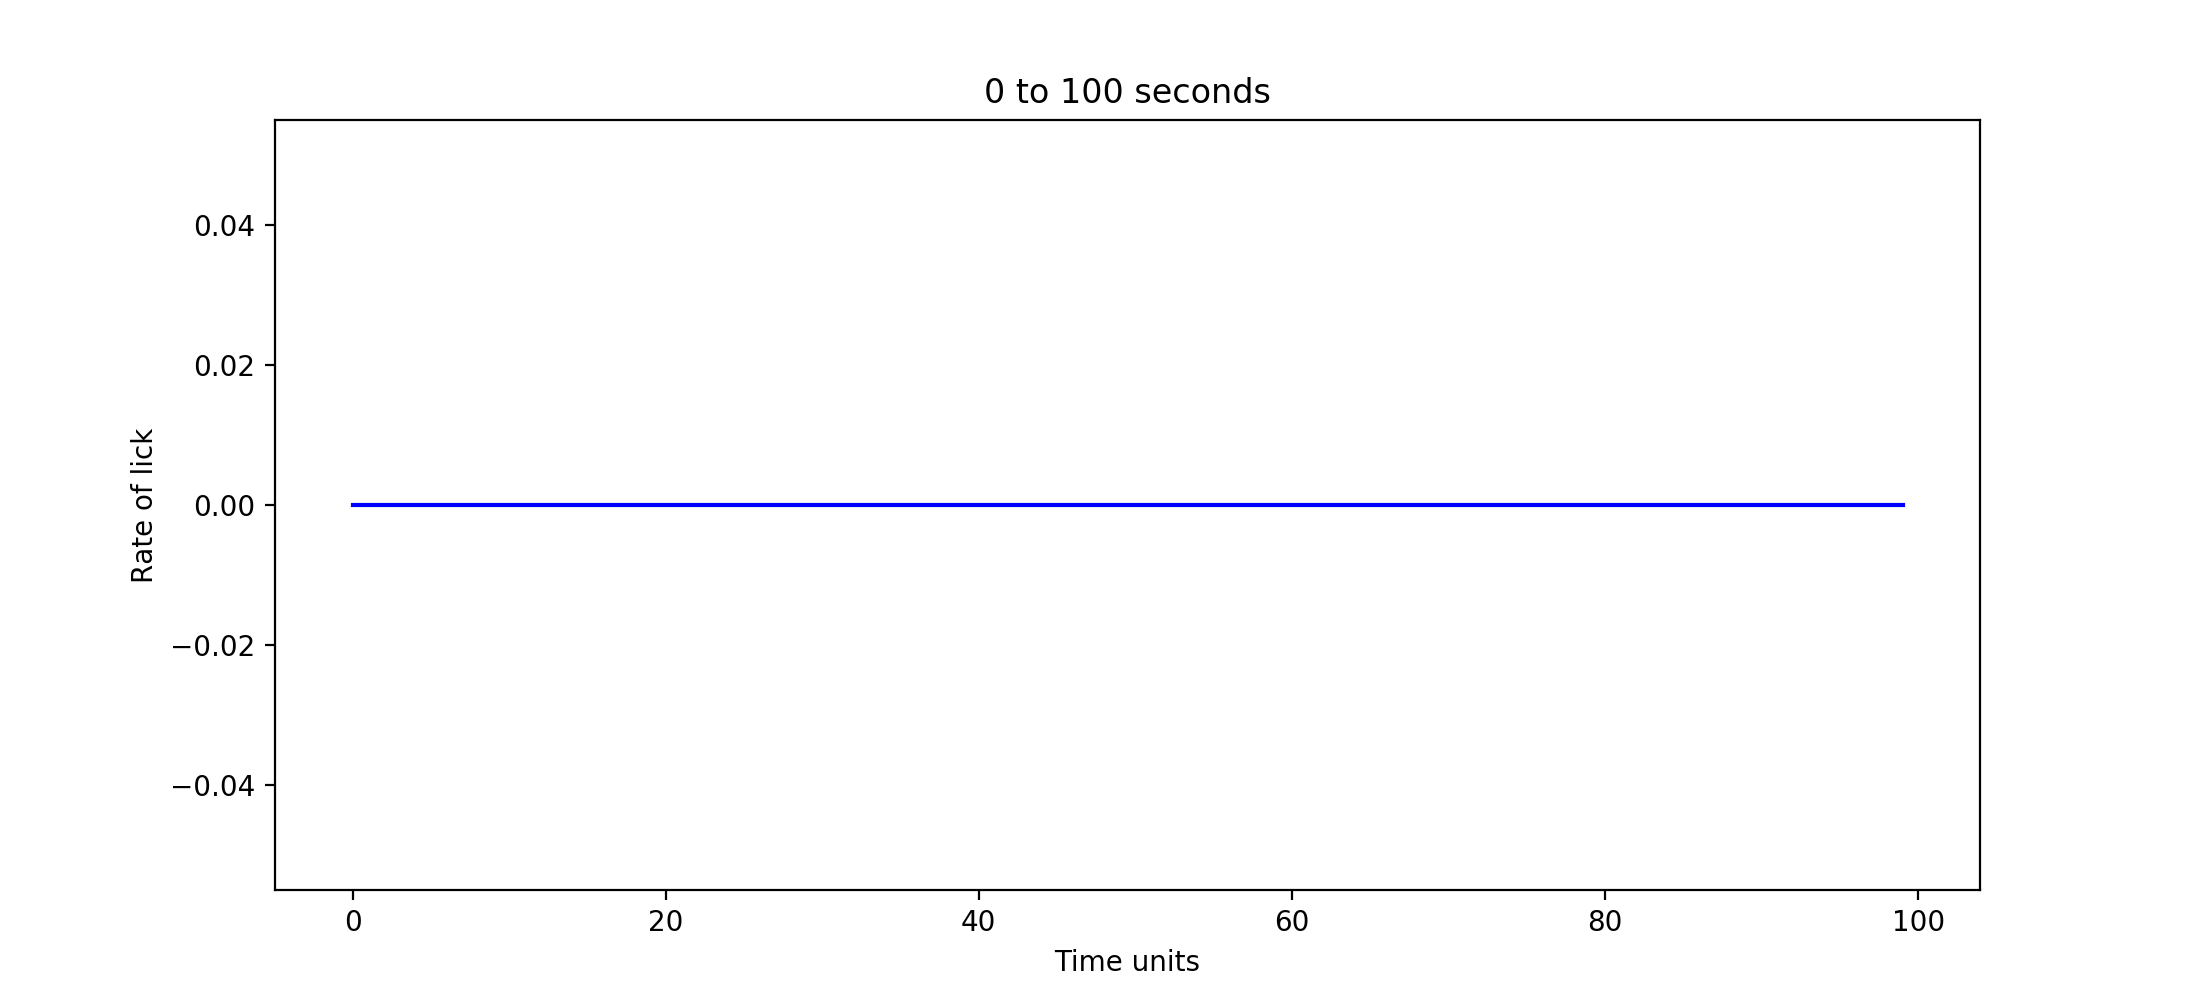

In [79]:
x = range(0, 100, 1)
y = np.array(duplicateFrequencies[1:101])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time units')
plt.ylabel('Rate of lick')
plt.title('0 to 100 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

<IPython.core.display.Javascript object>


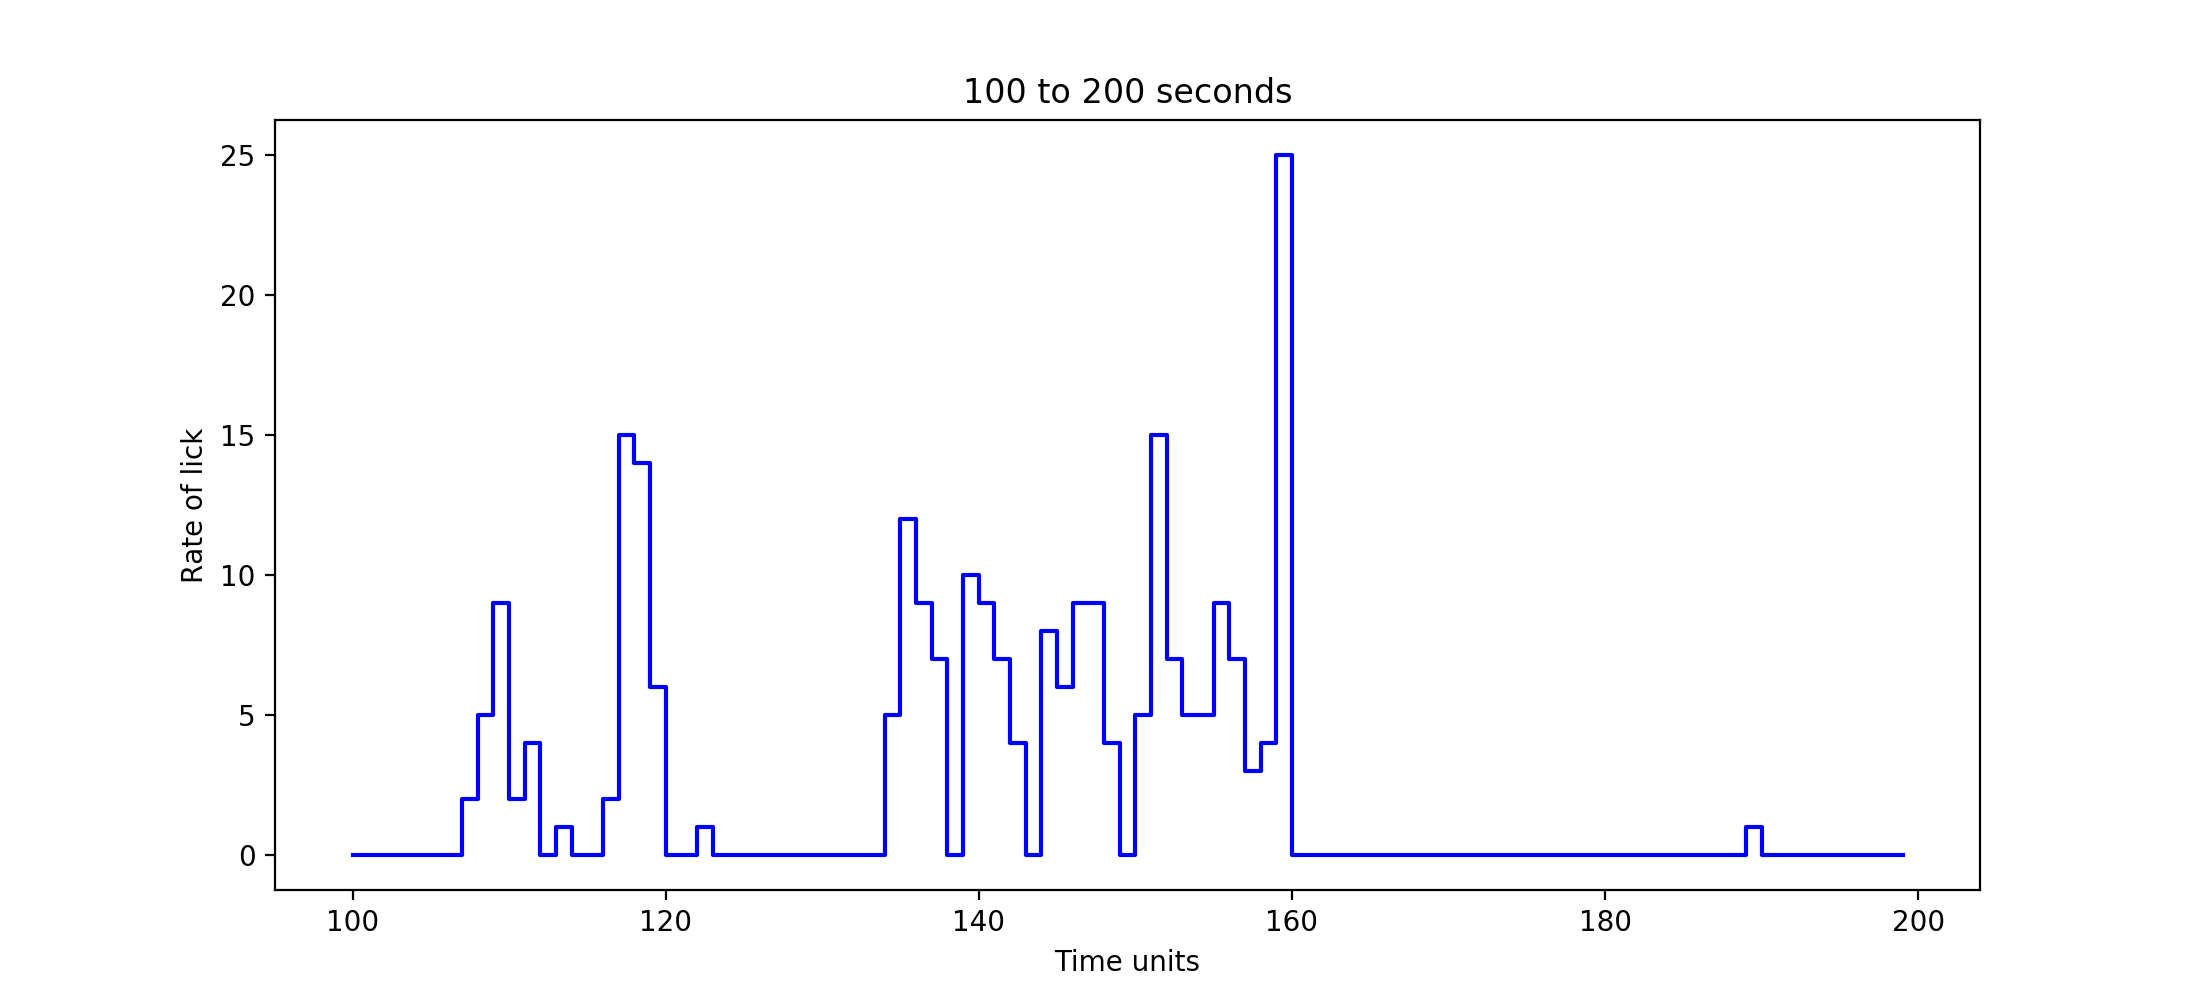

In [38]:
x = range(100, 200, 1)
y = np.array(duplicateFrequencies[100:200])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time units')
plt.ylabel('Rate of lick')
plt.title('100 to 200 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

<IPython.core.display.Javascript object>


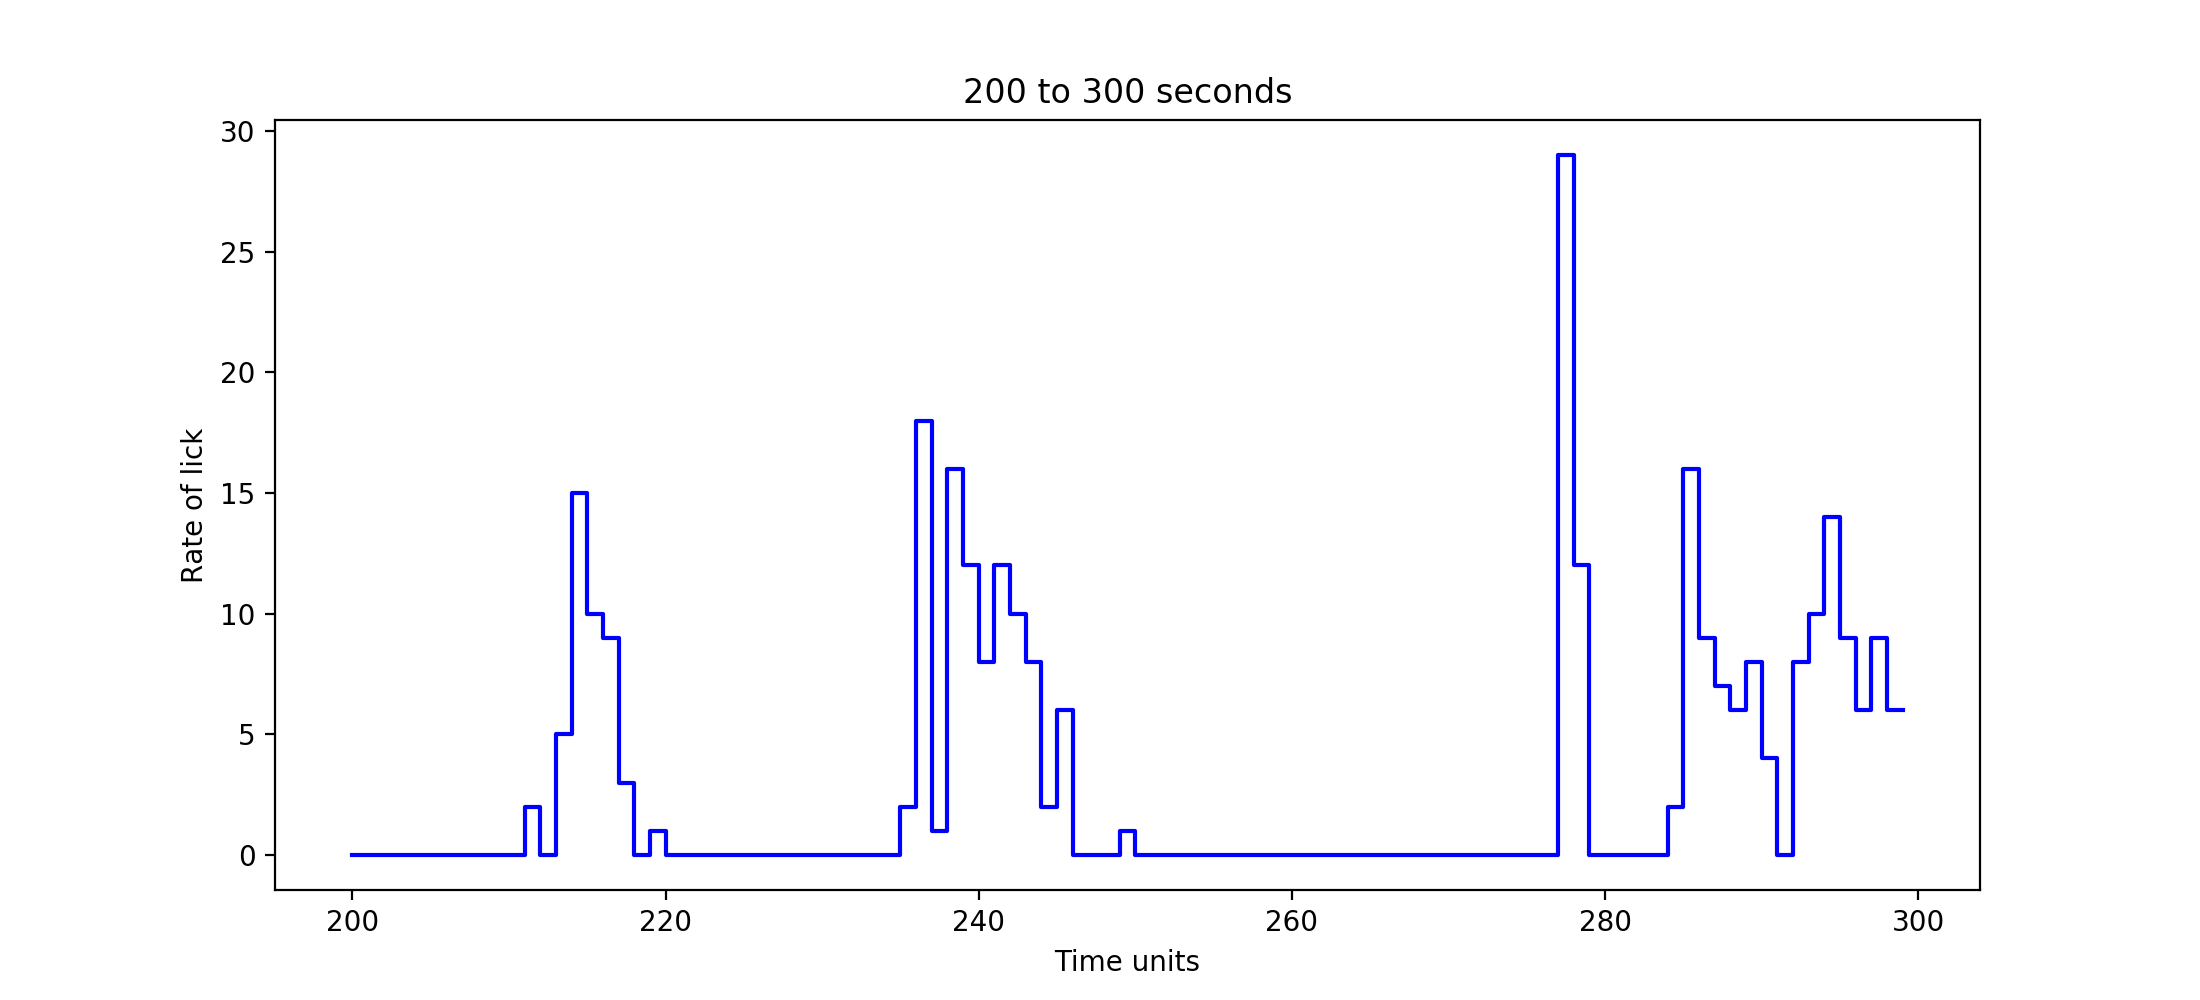

In [80]:
x = range(200, 300, 1)
y = np.array(duplicateFrequencies[200:300])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time units')
plt.ylabel('Rate of lick')
plt.title('200 to 300 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

<IPython.core.display.Javascript object>


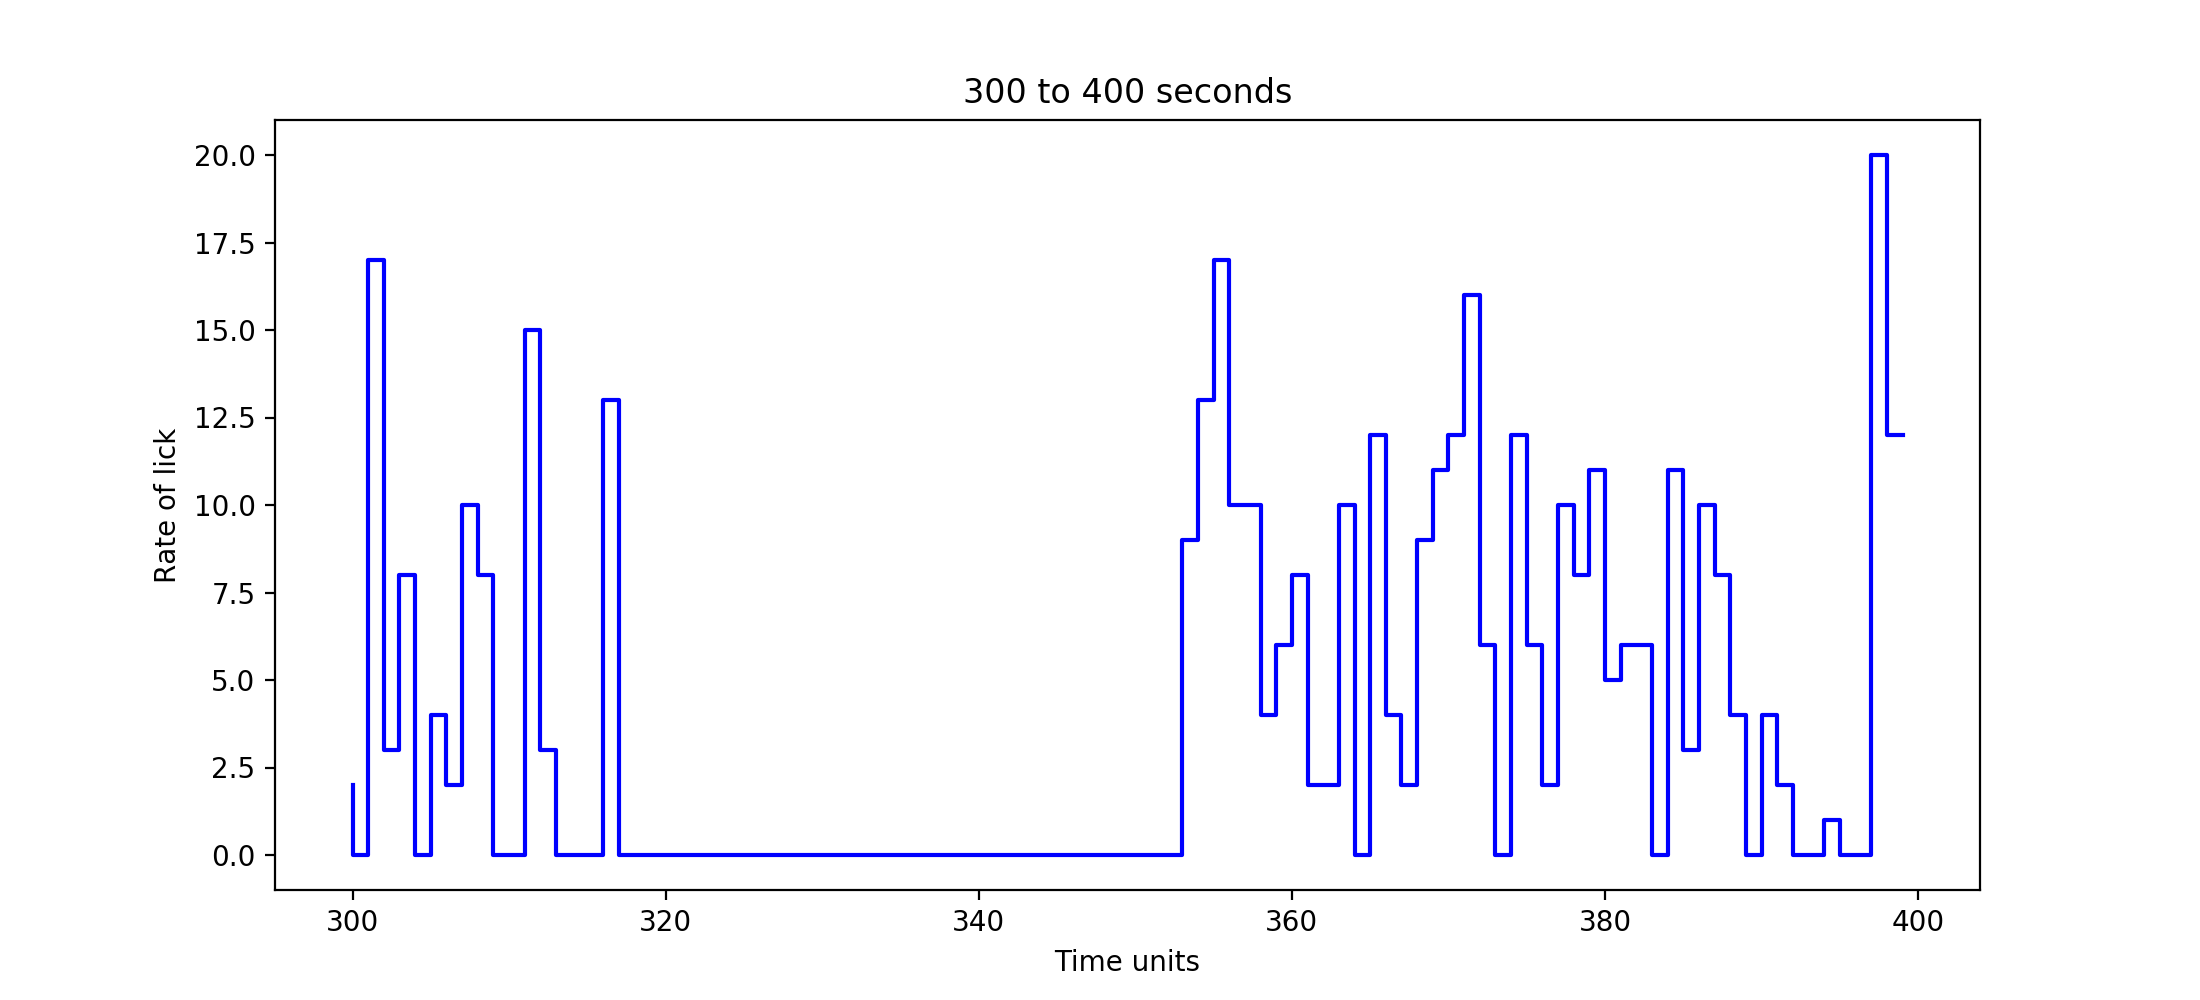

In [40]:
x = range(300, 400, 1)
y = np.array(duplicateFrequencies[300:400])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time units')
plt.ylabel('Rate of lick')
plt.title('300 to 400 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

<IPython.core.display.Javascript object>


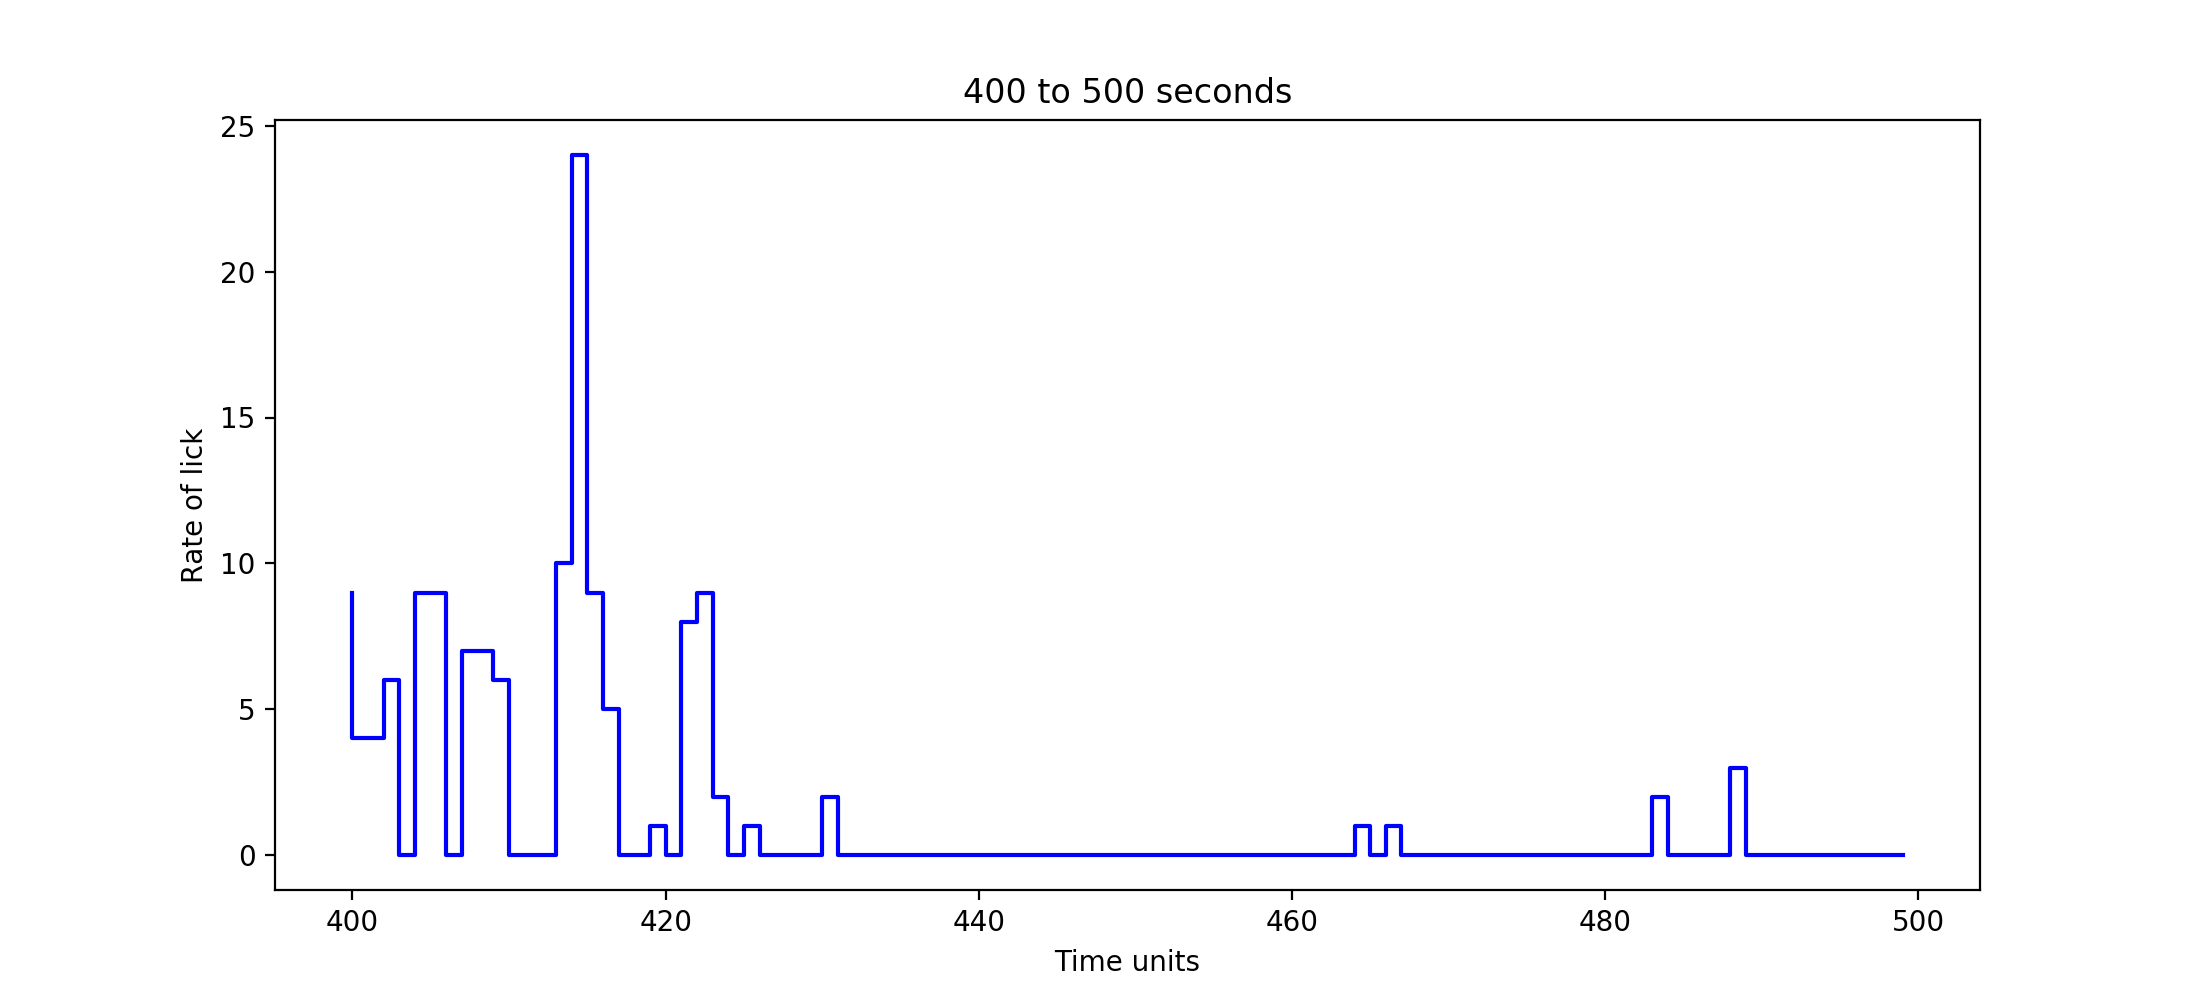

In [81]:
x = range(400, 500, 1)
y = np.array(duplicateFrequencies[400:500])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time units')
plt.ylabel('Rate of lick')
plt.title('400 to 500 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

<IPython.core.display.Javascript object>


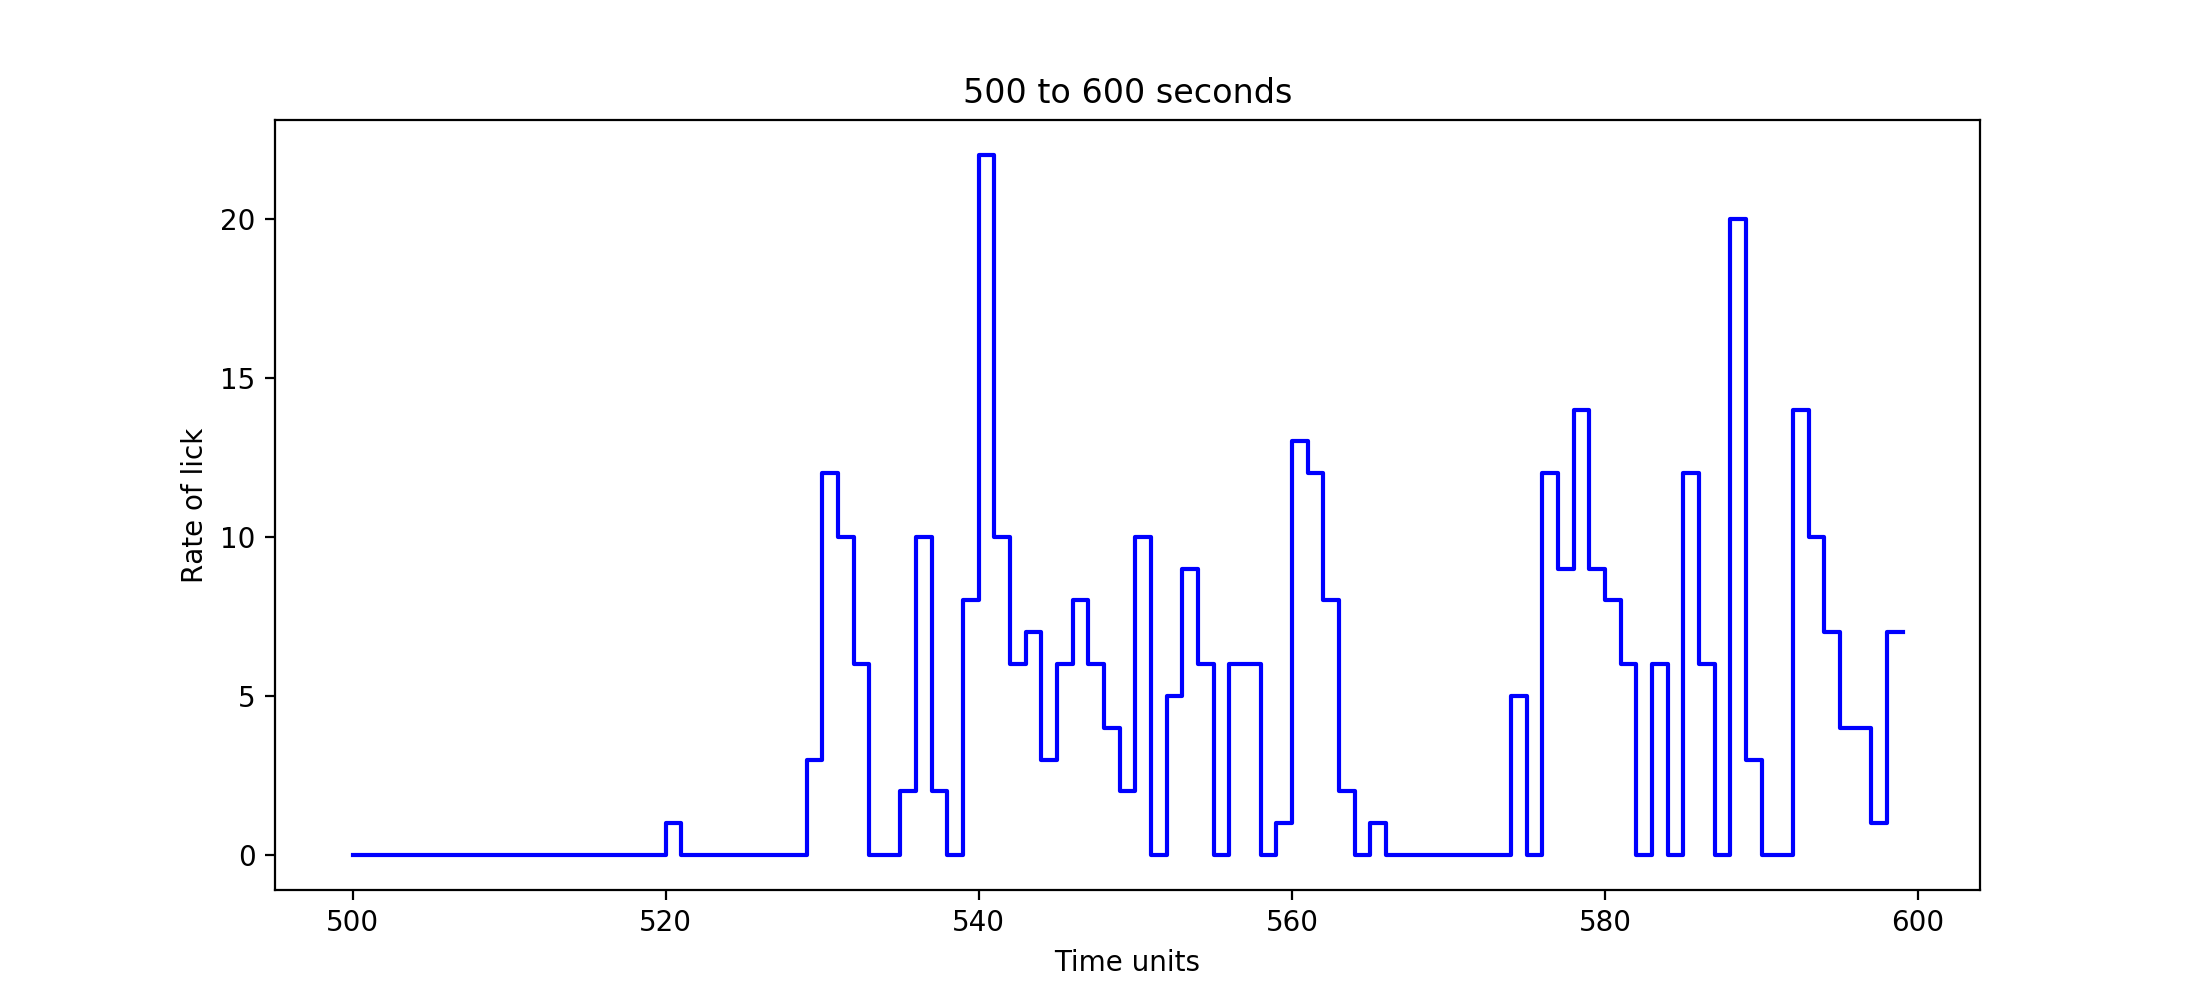

In [42]:
x = range(500, 600, 1)
y = np.array(duplicateFrequencies[500:600])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time units')
plt.ylabel('Rate of lick')
plt.title('500 to 600 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

<IPython.core.display.Javascript object>


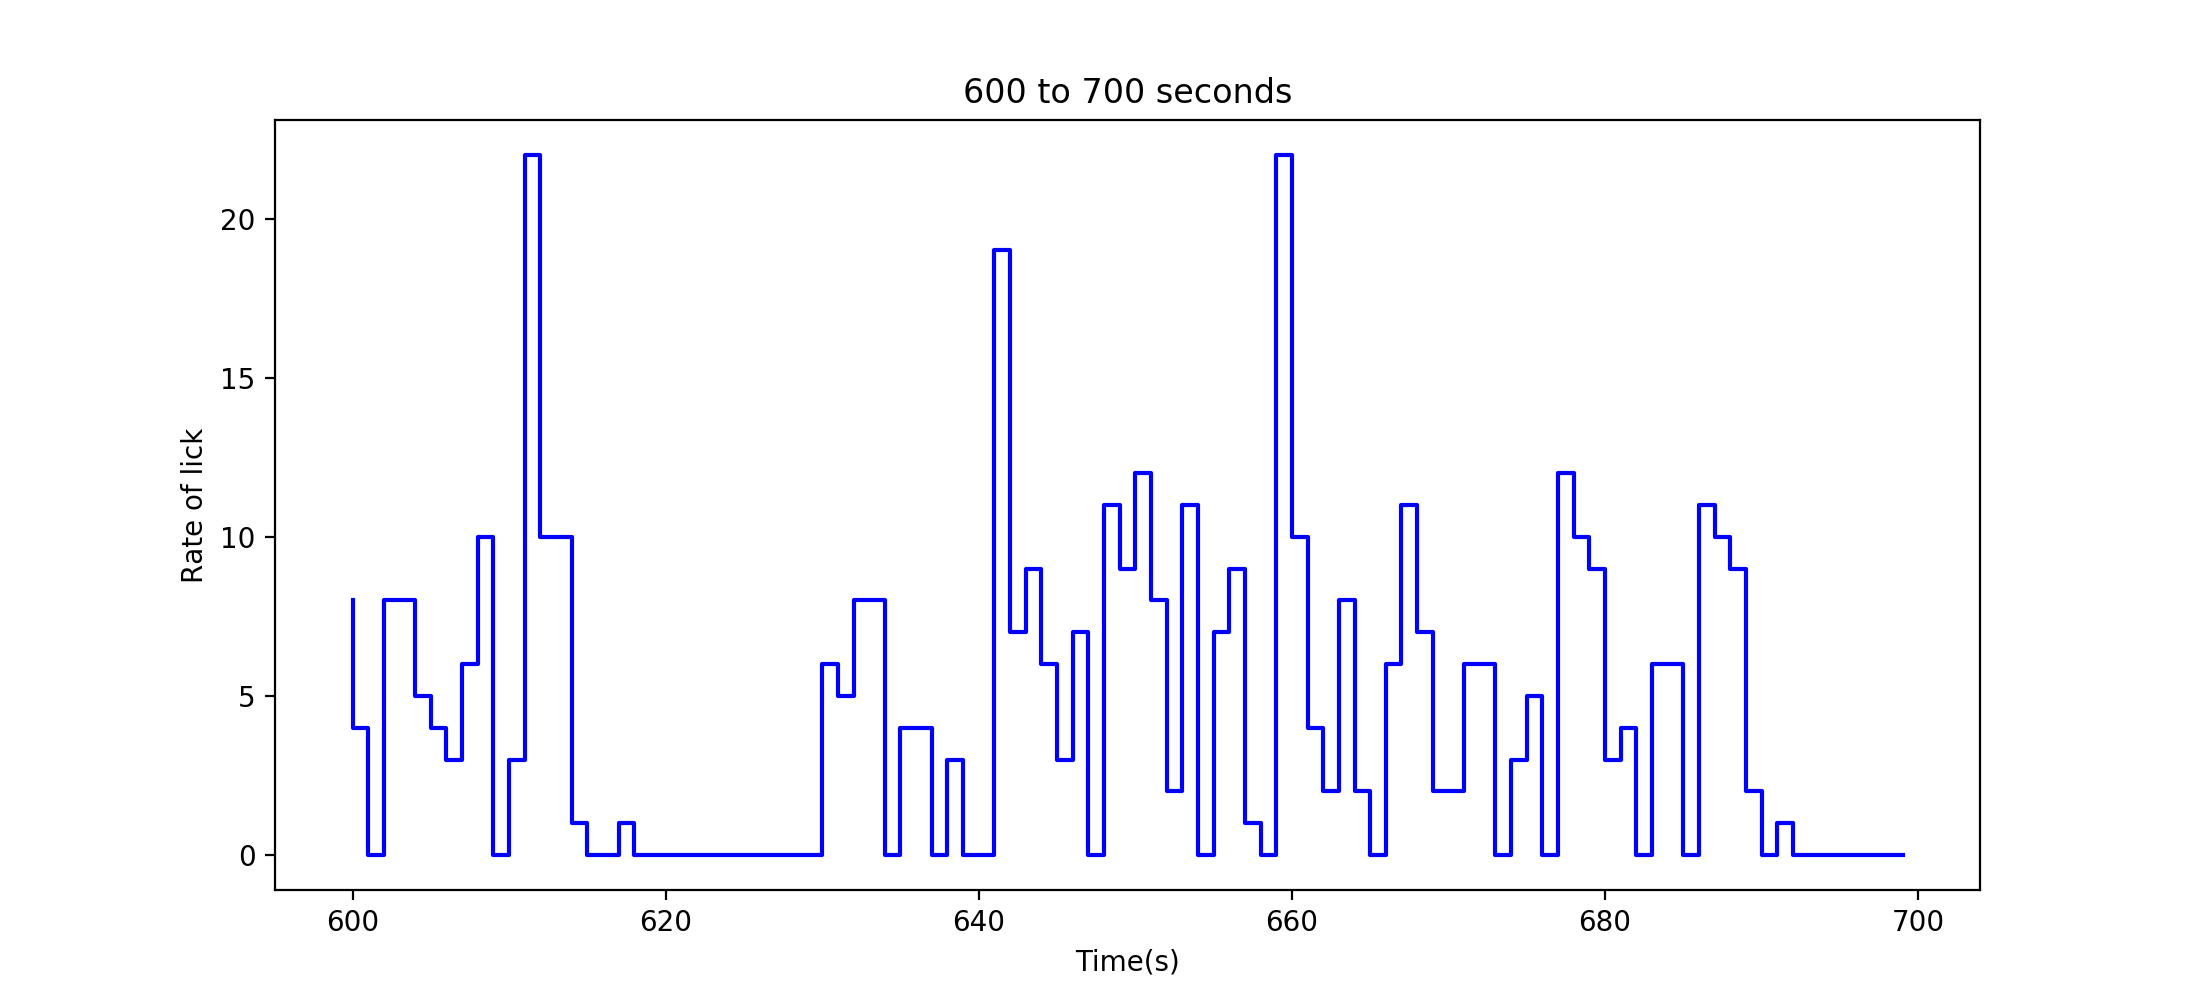

In [82]:
x = range(600, 700, 1)
y = np.array(duplicateFrequencies[600:700])

fig = plt.figure(figsize=(11,5))
plt.xlabel('Time(s)')
plt.ylabel('Rate of lick')
plt.title('600 to 700 seconds')
plt.step(x, y, 'b', where='pre')
plt.show()

## Lick Plot - II

In [83]:
# m_start and m_stop columns
df_m_start = ddv1['m_start'].apply(pd.Series)
df_m_start = df_m_start.rename(columns = lambda x : 'm_start_' + str(x))
df_m_stop = ddv1['m_stop'].apply(pd.Series)
df_m_stop = df_m_stop.rename(columns = lambda x : 'm_stop_' + str(x))
df_m_start_float = df_m_start.astype(float)
df_m_stop_float = df_m_stop.astype(float)
start_time_arr = np.array(ddv1['m_start'].apply(pd.Series).reset_index().T.reset_index()[0][3:].reset_index()[0])
stop_time_arr = np.array(ddv1['m_stop'].apply(pd.Series).reset_index().T.reset_index()[0][3:].reset_index()[0])

<IPython.core.display.Javascript object>


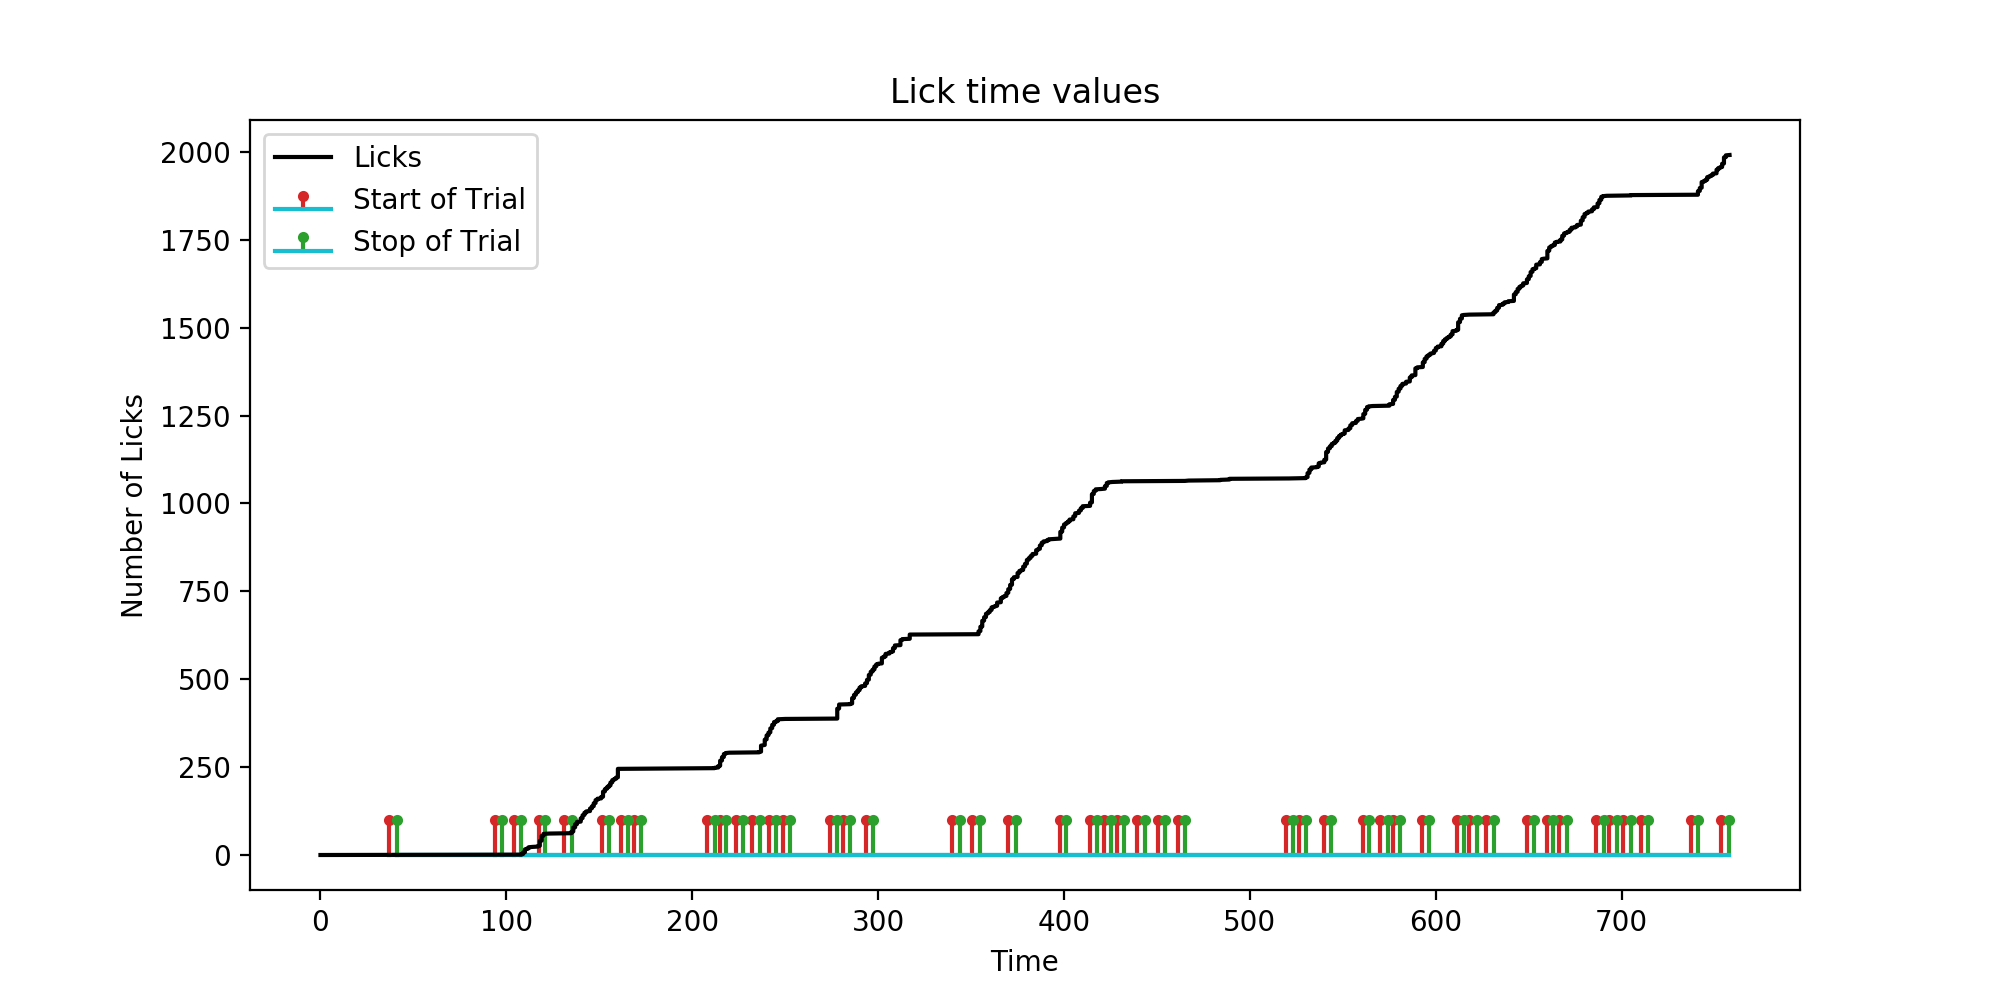

In [84]:
import matplotlib.pyplot as plt
number = range(lick_arr.size)
y = [100] * start_time_arr.size                        # change the value in [] to change the size of vertical bars
y = np.array(y)
fig = plt.figure(figsize=(10,5))

# cs_lick_arr = CubicSpline(number, lick_arr)
# vel_lick_arr = cs_lick_arr(number, 1)

plt.subplot(1, 1, 1)
plt.title('Lick time values')
plt.xlabel('Time')
plt.ylabel('Number of Licks')
plt.stem(start_time_arr, y, linefmt = 'C3-', markerfmt = 'C3.' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr, y, linefmt = 'C2-', markerfmt = 'C2.' ,basefmt = 'C9-', label = 'Stop of Trial') 
plt.plot(lick_arr, number, label = 'Licks', color = 'black')
# plt.plot(lick_arr[1:], number, label = 'Licks', color = 'black')
# plt.plot(lick_arr[1:], cs(lick_arr[1:], 1), label = 'Licks', color = 'red')
# plt.plot(vel_lick_arr, number, label = 'Licks/Time', color = 'red')

plt.legend()